In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data_selected= data[['OverallQual', 'GarageArea', '1stFlrSF','GrLivArea','TotalBsmtSF','YearBuilt','SalePrice']]
data_selected.isna().sum()

OverallQual    0
GarageArea     0
1stFlrSF       0
GrLivArea      0
TotalBsmtSF    0
YearBuilt      0
SalePrice      0
dtype: int64

In [4]:
train_dataset = data_selected.sample(frac=0.8, random_state=0)
test_dataset = data_selected.drop(train_dataset.index)

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('SalePrice')
test_labels = test_features.pop('SalePrice')

In [6]:
train_labels

529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
1168    235000
455     175500
584     133000
147     222500
160     162500
Name: SalePrice, Length: 1168, dtype: int64

In [7]:
normalizer = preprocessing.Normalization()

In [8]:
normalizer.adapt(np.array(train_features))


In [9]:
normalizer.mean.numpy()

array([   6.1532536,  477.2423   , 1168.4341   , 1530.6395   ,
       1066.3536   , 1971.1798   ], dtype=float32)

In [10]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   6  484 2515 2515 2035 1957]]

Normalized: [[-0.11  0.03  3.42  1.85  2.16 -0.46]]


In [25]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(126, activation='relu'),
      layers.Dense(126, activation='relu'),
      
      
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.1))
  return model



In [26]:
model=build_and_compile_model(normalizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 6)                 13        
_________________________________________________________________
dense_3 (Dense)              (None, 126)               882       
_________________________________________________________________
dense_4 (Dense)              (None, 126)               16002     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 127       
Total params: 17,024
Trainable params: 17,011
Non-trainable params: 13
_________________________________________________________________


In [27]:
%%time
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=50)

CPU times: user 3.82 s, sys: 279 ms, total: 4.1 s
Wall time: 3.07 s


In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [SalePrice]')
  plt.legend()
  plt.grid(True)

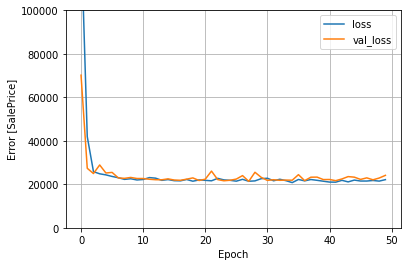

In [29]:
plot_loss(history)

In [16]:
eva= model.evaluate(test_features, test_labels, verbose=0)
eva


18782.02734375

Text(0, 0.5, 'Predictions ')

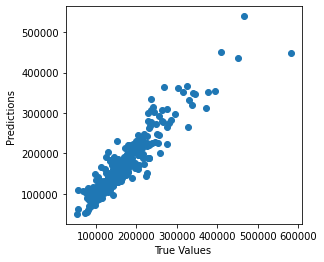

In [30]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


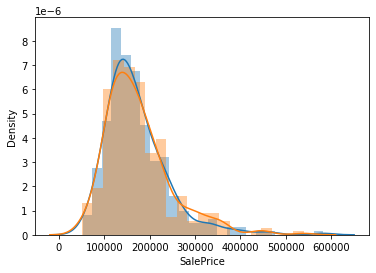

In [31]:
sns.distplot(test_labels)
sns.distplot(test_predictions)

In [19]:
upload = pd.read_csv('/content/test.csv')


In [20]:
upload_selected= upload[['Id','OverallQual', 'GarageArea', '1stFlrSF','GrLivArea','TotalBsmtSF','YearBuilt']]
upload_selected.GarageArea.fillna(value=480, inplace=True)
upload_selected.TotalBsmtSF.fillna(value=868, inplace=True)

upload_selected.isna().sum()


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Id             0
OverallQual    0
GarageArea     0
1stFlrSF       0
GrLivArea      0
TotalBsmtSF    0
YearBuilt      0
dtype: int64

In [21]:
train_dataset_up = upload_selected[['OverallQual', 'GarageArea', '1stFlrSF','GrLivArea','TotalBsmtSF','YearBuilt']]


In [22]:
upload_selected['SalePrice'] = model.predict(train_dataset_up).flatten()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
upload_selected['SalePrice']

0       136794.296875
1       153396.468750
2       170465.578125
3       181872.265625
4       203163.140625
            ...      
1454    104270.476562
1455    113316.250000
1456    147021.906250
1457    128067.921875
1458    224808.843750
Name: SalePrice, Length: 1459, dtype: float32

In [24]:
upload_selected[['Id','SalePrice']].to_csv('tf.csv', index=False)